# **Project Summary**
- Uses images from the CK+ dataset that have 7 emotional labels:
      - 0 = 'happy'
      - 1 = 'anger'
      - 2 = 'contempt'
      - 3 = 'fear'
      - 4 = 'surprise'
      - 5 = 'sadness'
      - 6 = 'disgust'

- NOTE: The values change everytime the model is retrained. The following values are only for the .h5 model file submitted.
- The dataset images are stored in separate folders- each folder representing a separate emotion
- Trained for 50 epochs using a CNN architecture composing of:
       - an input Conv2D layer (with 32 filters) paired with and MaxPooling2D layer.
       - 3 pairs of Conv2D (with 64, 128 & 256 filters) and MaxPooling2D layers,
       - 1 Dense layer with 128 nodes, and
       - an output Dense layer with 7 nodes.

# **Upload CK+ dataset images to Collab**


In [ ]:
# Upload ZIP file from PC
from google.colab import files
uploaded = files.upload()

In [ ]:
# Extract ZIP file
import zipfile
import os

# Path to the uploaded ZIP file
zip_file_path = '/content/CK+48.zip'
extract_folder = '/content/'      # Destination folder

# Create a directory to extract files
os.makedirs(extract_folder, exist_ok=True)

# Extract ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# Verify extraction
print("Files extracted:")
print(os.listdir(extract_folder))

# **Import dependencies**

In [ ]:
import numpy as np
import tensorflow as tf

from sklearn.model_selection import train_test_split

import os
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

import pandas as pd

from keras.models import Sequential,load_model,Model
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,BatchNormalization,Flatten,Input
from sklearn.model_selection import train_test_split


# **Import CK+ Dataset**

In [ ]:
# Define  and verify sub_folder object
dataset_folder='/content/CK+48'
sub_folders=os.listdir(dataset_folder)

sub_folders

In [ ]:
# Reading folder names as labels and images underneath
i=0
last=[]
images=[]
labels=[]
temp = sub_folders

# reading folders in the main dataset folder, one at a time
for sub_folder in sub_folders:
  sub_folder_index = temp.index(sub_folder)
  label = sub_folder_index

  path = dataset_folder+'/'+sub_folder
  sub_folder_images= os.listdir(path)

  # reading images in the sub folder, one at a time
  for image in sub_folder_images:
    image_path = path+'/'+image
    print(image_path+"\t"+str(label))

    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image= cv2.resize(image,(48,48))
    images.append(image)
    labels.append(label)
    i+=1
  last.append(i)


/content/CK+48/happy/S114_006_00000023.png	0
/content/CK+48/happy/S064_003_00000025.png	0
/content/CK+48/happy/S116_007_00000017.png	0
/content/CK+48/happy/S096_004_00000010.png	0
/content/CK+48/happy/S074_005_00000041.png	0
/content/CK+48/happy/S074_005_00000043.png	0
/content/CK+48/happy/S010_006_00000014.png	0
/content/CK+48/happy/S075_006_00000023.png	0
/content/CK+48/happy/S075_006_00000025.png	0
/content/CK+48/happy/S125_005_00000011.png	0
/content/CK+48/happy/S116_007_00000015.png	0
/content/CK+48/happy/S061_002_00000015.png	0
/content/CK+48/happy/S138_005_00000014.png	0
/content/CK+48/happy/S066_003_00000012.png	0
/content/CK+48/happy/S095_007_00000021.png	0
/content/CK+48/happy/S011_006_00000012.png	0
/content/CK+48/happy/S094_004_00000011.png	0
/content/CK+48/happy/S069_004_00000015.png	0
/content/CK+48/happy/S035_006_00000016.png	0
/content/CK+48/happy/S034_005_00000008.png	0
/content/CK+48/happy/S089_002_00000021.png	0
/content/CK+48/happy/S014_005_00000016.png	0
/content/C

In [ ]:
images_x = np.array(images)
labels_y = np.array(labels)

# we divide image pixels by 255 to reduce computation power
images_x = images_x/255
images_x.shape

(981, 48, 48)

In [ ]:
# encoding the labels
num_of_classes = 7
labels_y_encoded = tf.keras.utils.to_categorical(labels_y,num_classes=num_of_classes)

# **Split dataset into Training(80%) and Testing(20%) data**
Follows guidelines from machine learning slides in Week 3

In [ ]:
X_train, X_test, Y_train, Y_test= train_test_split(images_x, labels_y_encoded,test_size=0.2, random_state=10)

In [ ]:
len(X_train) # Number of training images

784

In [ ]:
len(X_test) # Number of testing images

197

# **Define CNN Architecture**

In [ ]:
input = Input(shape = (48,48,1))

conv1 = Conv2D(32,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(input)
conv1 = Dropout(0.1)(conv1)
conv1 = Activation('relu')(conv1)
pool1 = MaxPooling2D(pool_size = (2,2)) (conv1)

conv2 = Conv2D(64,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(pool1)
conv2 = Dropout(0.1)(conv2)
conv2 = Activation('relu')(conv2)
pool2 = MaxPooling2D(pool_size = (2,2)) (conv2)

conv3 = Conv2D(128,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(pool2)
conv3 = Dropout(0.1)(conv3)
conv3 = Activation('relu')(conv3)
pool3 = MaxPooling2D(pool_size = (2,2)) (conv3)

conv4 = Conv2D(256,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(pool3)
conv4 = Dropout(0.1)(conv4)
conv4 = Activation('relu')(conv4)
pool4 = MaxPooling2D(pool_size = (2,2)) (conv4)

flatten = Flatten()(pool4)

dense_1 = Dense(128,activation='relu')(flatten)

drop_1 = Dropout(0.2)(dense_1)

output = Dense(3,activation="sigmoid")(drop_1)

In [ ]:
model = Model(inputs=input,outputs=output)
model.compile(optimizer="adam", loss=["categorical_crossentropy"], metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 dropout (Dropout)           (None, 48, 48, 32)        0         
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                             

# **Train Model**

In [ ]:
# Set output file and training settings
fle_s='/content/models/ck+_model.h5'
checkpointer = ModelCheckpoint(fle_s, monitor='loss',verbose=1,save_best_only=True,
                               save_weights_only=False, mode='auto',save_freq='epoch')
callback_list=[checkpointer]

# Assuming Y_train has 7 classes, adjust the output layer to 7 neurons
output = Dense(7,activation="sigmoid")(drop_1)

model = Model(inputs=input,outputs=output)
model.compile(optimizer="adam", loss=["categorical_crossentropy"], metrics=['accuracy'])

# Finally start training models :D
save = model.fit(X_train,Y_train,batch_size=32,validation_data=(X_test,Y_test),epochs=50,callbacks=[callback_list])


Epoch 1/50
25/25 [==============================] - ETA: 0s - loss: 2.0692 - accuracy: 0.2245
Epoch 1: loss improved from inf to 2.06920, saving model to /content/models/ck+_model.h5
25/25 [==============================] - 9s 62ms/step - loss: 2.0692 - accuracy: 0.2245 - val_loss: 1.9995 - val_accuracy: 0.2030
Epoch 2/50
17/25 [===================>..........] - ETA: 0s - loss: 1.9461 - accuracy: 0.2684

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


24/25 [===========================>..] - ETA: 0s - loss: 1.9279 - accuracy: 0.2578
Epoch 2: loss improved from 2.06920 to 1.92592, saving model to /content/models/ck+_model.h5
25/25 [==============================] - 0s 11ms/step - loss: 1.9259 - accuracy: 0.2615 - val_loss: 1.8664 - val_accuracy: 0.2487
Epoch 3/50
25/25 [==============================] - ETA: 0s - loss: 1.7653 - accuracy: 0.3329
Epoch 3: loss improved from 1.92592 to 1.76525, saving model to /content/models/ck+_model.h5
25/25 [==============================] - 0s 10ms/step - loss: 1.7653 - accuracy: 0.3329 - val_loss: 1.5854 - val_accuracy: 0.4924
Epoch 4/50
23/25 [==========================>...] - ETA: 0s - loss: 1.4045 - accuracy: 0.5082
Epoch 4: loss improved from 1.76525 to 1.40120, saving model to /content/models/ck+_model.h5
25/25 [==============================] - 0s 11ms/step - loss: 1.4012 - accuracy: 0.5051 - val_loss: 1.3208 - val_accuracy: 0.5431
Epoch 5/50
23/25 [==========================>...] - ETA: 0s 

# **Model Performance**

Text(0.5, 0.92, 'Loss and accuracy of CK+ CNN Model')

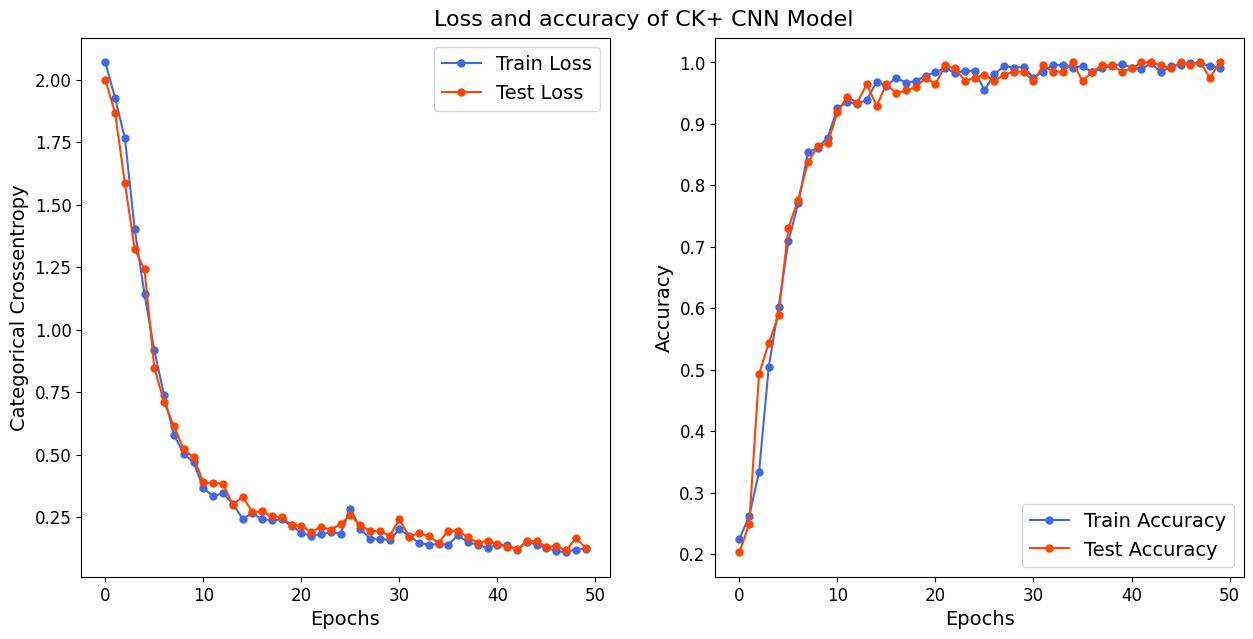

In [ ]:
# Checking the train and test loss and accuracy values from the neural network above.

train_loss = save.history['loss']
test_loss = save.history['val_loss']
train_accuracy = save.history['accuracy']
test_accuracy = save.history['val_accuracy']


# Plotting a line chart to visualize the loss and accuracy values by epochs.

fig, ax = plt.subplots(ncols=2, figsize=(15,7))

ax = ax.ravel()

ax[0].plot(train_loss, label='Train Loss', color='royalblue', marker='o', markersize=5)
ax[0].plot(test_loss, label='Test Loss', color = 'orangered', marker='o', markersize=5)

ax[0].set_xlabel('Epochs', fontsize=14)
ax[0].set_ylabel('Categorical Crossentropy', fontsize=14)

ax[0].legend(fontsize=14)
ax[0].tick_params(axis='both', labelsize=12)

ax[1].plot(train_accuracy, label='Train Accuracy', color='royalblue', marker='o', markersize=5)
ax[1].plot(test_accuracy, label='Test Accuracy', color='orangered', marker='o', markersize=5)

ax[1].set_xlabel('Epochs', fontsize=14)
ax[1].set_ylabel('Accuracy', fontsize=14)

ax[1].legend(fontsize=14)
ax[1].tick_params(axis='both', labelsize=12)

fig.suptitle(x=0.5, y=0.92, t="Loss and accuracy of CK+ CNN Model", fontsize=16)

# **Test model**

In [ ]:
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files

# Load your trained model
model = tf.keras.models.load_model('/content/models/ck+_model.h5')

# Define the labels
labels = ['happy', 'anger', 'contempt', 'fear', 'surprise', 'sadness', 'disgust']

# Function to preprocess and predict emotion
def preprocess_image(image_path):
    image = Image.open(image_path)
    image = image.resize((48, 48))  # Assuming your model expects 48x48 pixel images
    image = image.convert('L')  # Convert to grayscale
    image = np.array(image)
    image = image / 255.0  # Normalize the image
    image = image.reshape(1, 48, 48, 1)  # Reshape for the model
    return image

def predict_emotion(image_path):
    # Preprocess the image
    image = preprocess_image(image_path)

    # Check the preprocessed image
    plt.imshow(image.reshape(48, 48), cmap='gray')
    plt.title('Preprocessed Image')
    plt.axis('off')
    plt.show()

    # Make a prediction
    prediction = model.predict(image)
    predicted_label = labels[np.argmax(prediction)]

    # Print the prediction probabilities for debugging
    print(f'Prediction probabilities: {prediction}')

    return predicted_label

# Upload an image
uploaded = files.upload()

# Assuming only one file is uploaded, get the file name
image_path = list(uploaded.keys())[0]

# Predict the emotion
predicted_emotion = predict_emotion(image_path)

# Display the image and the prediction
image = Image.open(image_path)
plt.imshow(image)
plt.title(f'Predicted Emotion: {predicted_emotion}')
plt.axis('off')
plt.show()



# **Create Gradio Interface**

In [ ]:
# Install Gradio
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 73.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.6/318.6 kB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 70.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 9.9 MB/s eta 0:00:00
  Attempting uninstall: tomlkit
    Found existing i

In [ ]:
#['happy', 'anger', 'contempt', 'fear', 'surprise', 'sadness', 'disgust']

import tensorflow as tf
import numpy as np
from PIL import Image
import gradio as gr
import matplotlib.pyplot as plt
import io

# Load trained model - ensure the model path is correct
model_path = '/content/ck+_model.h5'
model = tf.keras.models.load_model(model_path)

# Define the labels
labels = ['happy', 'anger', 'contempt', 'fear', 'surprise', 'sadness', 'disgust']

# Define the prediction function
def predict_emotion(image):
    try:
        # Preprocess the image
        image = image.resize((48, 48))  # Resize to 48x48 pixels
        image = image.convert('L')  # Convert to grayscale
        image = np.array(image)
        image = image / 255.0  # Normalize the image
        image = image.reshape(1, 48, 48, 1)  # Reshape for the model

        # Make a prediction
        prediction = model.predict(image)[0]

        # Generate bar graph
        fig, ax = plt.subplots()
        ax.bar(labels, prediction)
        ax.set_ylabel('Probability')
        ax.set_title('Emotion Prediction Probabilities')
        plt.xticks(rotation=45)

        # Save plot to a BytesIO object and return it
        buf = io.BytesIO()
        plt.savefig(buf, format='png')
        buf.seek(0)
        plt.close(fig)

        # Convert BytesIO to PIL Image
        plot_image = Image.open(buf)

        return {label: prob for label, prob in zip(labels, prediction)}, plot_image

    except Exception as e:
        return f"Error in processing the image: {str(e)}", None

# Define the Gradio interface
interface = gr.Interface(
    fn=predict_emotion,
    inputs=gr.Image(type="pil"),
    outputs=[gr.Label(num_top_classes=7), gr.Image(type="pil")],
    title="Facial Expression Recognition",
    description="Upload an image to predict the emotion and see the prediction probabilities."
)

# Launch the Gradio app
interface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://efed0f9f96a013de4f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
